In [5]:
import pandas as pd
import numpy as np  

dataset = pd.read_csv('HeartDisease.csv')
print(dataset.shape)

dataset['education'] = dataset['education'].fillna(1)
dataset['cigsPerDay'] = dataset['cigsPerDay'].fillna(1)
dataset['BPMeds'] = dataset['BPMeds'].fillna(0)

columns_to_fill = ['totChol', 'BMI', 'glucose', "heartRate"]
means = dataset[columns_to_fill].mean()
dataset[columns_to_fill] = dataset[columns_to_fill].fillna(means)



print(dataset['HeartDisease'].value_counts())

majority_class = dataset[dataset['HeartDisease'] == 0]
minority_class = dataset[dataset['HeartDisease'] == 1]

majority_class_undersampled = majority_class.sample(len(minority_class), random_state=42)

undersampled_dataset = pd.concat([majority_class_undersampled, minority_class])
undersampled_dataset = undersampled_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset = undersampled_dataset

print(dataset['HeartDisease'].value_counts())


from sklearn.model_selection import train_test_split
trainSet, tempSet = train_test_split(dataset, test_size=0.30, random_state=42)
valSet, testSet = train_test_split(tempSet, test_size=0.50, random_state=42)

print(trainSet.shape)
print(valSet.shape)
print(testSet.shape)




(4238, 16)
HeartDisease
0    3594
1     644
Name: count, dtype: int64
HeartDisease
1    644
0    644
Name: count, dtype: int64
(901, 16)
(193, 16)
(194, 16)


Cost after iteration 0: 0.6932445407230905
Cost after iteration 100: 0.6890209994047091
Cost after iteration 200: 0.6854171883913912
Cost after iteration 300: 0.6824330798630684
Cost after iteration 400: 0.6798279153104716
Cost after iteration 500: 0.6774725884657053
Cost after iteration 600: 0.675296665811087
Cost after iteration 700: 0.673260721604921
Cost after iteration 800: 0.6713418133056378
Cost after iteration 900: 0.6695257950559843
Cost after iteration 1000: 0.6678032275418695
Cost after iteration 1100: 0.6661671995480651
Cost after iteration 1200: 0.6646121733025889
Cost after iteration 1300: 0.6631333796214545
Cost after iteration 1400: 0.6617265074243004
Cost after iteration 1500: 0.6603875492577181
Cost after iteration 1600: 0.6591127278622908
Cost after iteration 1700: 0.6578984634014114
Cost after iteration 1800: 0.6567413598886934
Cost after iteration 1900: 0.6556381996816072
Cost after iteration 2000: 0.6545859405075728
Cost after iteration 2100: 0.6535817124768863
Co

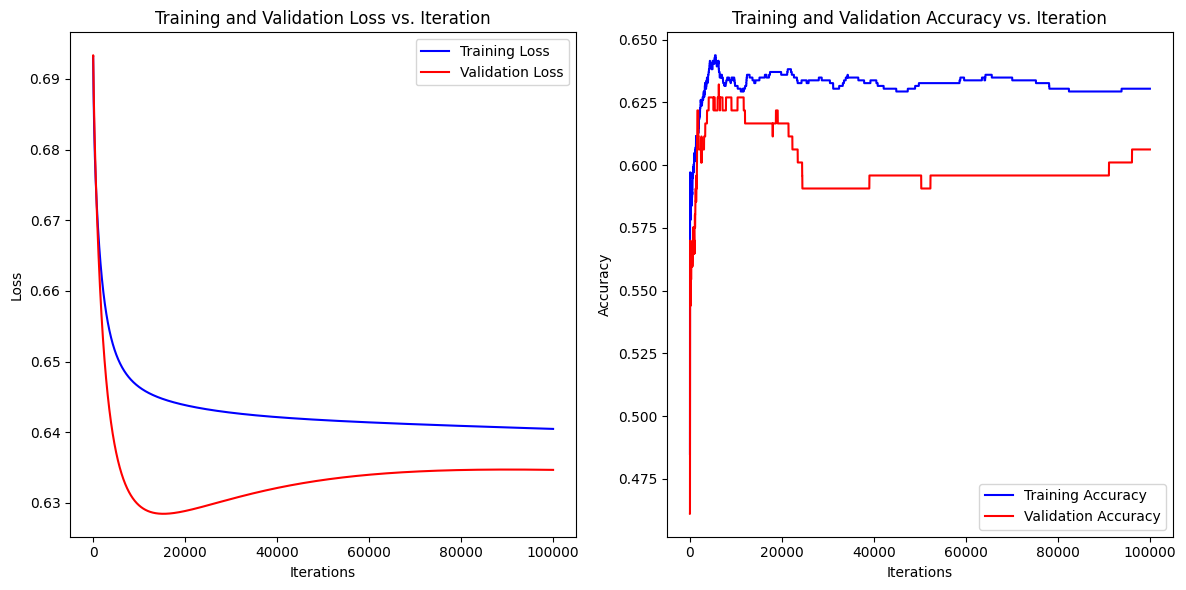

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def crossEntropyLoss(y_true, y_pred):
    m = len(y_true)
    return -(1/m) * np.sum(y_true * np.log(y_pred+1e-8) + (1 - y_true) * np.log(1 - y_pred+1e-8))


def LogisticRegressionBatchGD(X_train, y_train, X_val, y_val, learning_rate, iterations):
    m = len(y_train)
    
    train_cost_history = []
    train_accuracy_history = []
    val_cost_history = []
    val_accuracy_history = []
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    for i in range(iterations):
        z = np.dot(X_train, weights) + bias
        y_pred = sigmoid(z)

        dz = y_pred - y_train
        dw = (1/m) * np.dot(X_train.T, dz)
        db = (1/m) * np.sum(dz)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        loss = crossEntropyLoss(y_train, y_pred)
        train_cost_history.append(loss)

        val_y_pred = sigmoid(np.dot(X_val, weights) + bias)

        loss = crossEntropyLoss(y_val, val_y_pred)
        val_cost_history.append(loss)

        accuracy = np.mean((y_pred >= 0.5) == y_train)
        train_accuracy_history.append(accuracy)

        accuracy = np.mean((val_y_pred >= 0.5) == y_val)
        val_accuracy_history.append(accuracy)

        if i % 100 == 0:
            print(f'Cost after iteration {i}: {loss}')

    return weights, bias, train_cost_history, train_accuracy_history, val_cost_history, val_accuracy_history, val_y_pred


X_train = trainSet.iloc[:, :-1].values
y_train = trainSet.iloc[:, -1].values
X_val = valSet.iloc[:, :-1].values
y_val = valSet.iloc[:, -1].values
iterations = 100000
learning_rate = 0.00001

weights, bias, train_cost_history, train_accuracy_history, val_cost_history, val_accuracy_history, val_y_pred = LogisticRegressionBatchGD(X_train, y_train,X_val, y_val, learning_rate, iterations)

import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_cost_history, label='Training Loss', color='blue')
plt.plot(val_cost_history, label='Validation Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

Cost after iteration 0: 0.693147094491186
Cost after iteration 100: 0.6931404886582776
Cost after iteration 200: 0.693133884889745
Cost after iteration 300: 0.6931272831840661
Cost after iteration 400: 0.6931206835397211
Cost after iteration 500: 0.6931140859551906
Cost after iteration 600: 0.6931074904289574
Cost after iteration 700: 0.6931008969595054
Cost after iteration 800: 0.6930943055453205
Cost after iteration 900: 0.6930877161848897
Cost after iteration 1000: 0.6930811288767014
Cost after iteration 1100: 0.6930745436192461
Cost after iteration 1200: 0.6930679604110148
Cost after iteration 1300: 0.6930613792505013
Cost after iteration 1400: 0.6930548001361996
Cost after iteration 1500: 0.6930482230666063
Cost after iteration 1600: 0.6930416480402188
Cost after iteration 1700: 0.6930350750555359
Cost after iteration 1800: 0.6930285041110583
Cost after iteration 1900: 0.6930219352052883
Cost after iteration 2000: 0.6930153683367292
Cost after iteration 2100: 0.6930088035038859
Co

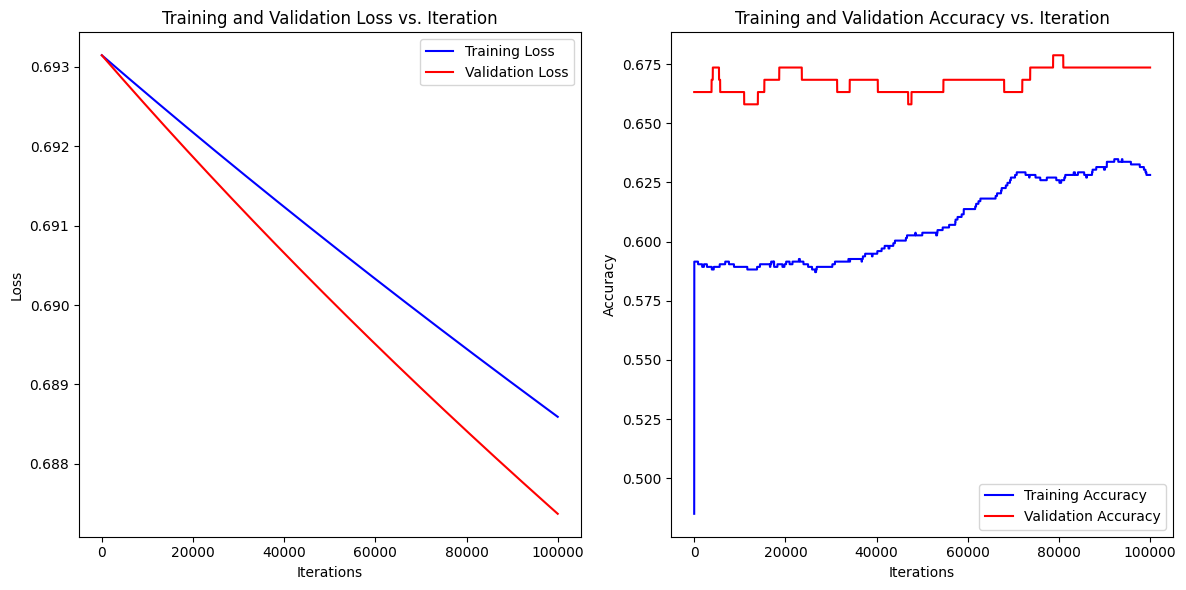

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

weights, bias, train_cost_history, train_accuracy_history, val_cost_history, val_accuracy_history,val_y_pred = LogisticRegressionBatchGD(X_train_scaled, y_train,X_val_scaled, y_val, learning_rate, iterations)

plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_cost_history, label='Training Loss', color='blue')
plt.plot(val_cost_history, label='Validation Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Assume y_true and y_pred are your true and predicted labels
print(y_val)
print(val_y_pred)
val_y_pred_binary = (val_y_pred >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, val_y_pred_binary)
tn, fp, fn, tp = conf_matrix.ravel()

precision = precision_score(y_val, val_y_pred_binary)
recall = recall_score(y_val, val_y_pred_binary)
f1 = f1_score(y_val, val_y_pred_binary)
roc_auc = roc_auc_score(y_val, val_y_pred_binary)  # y_prob are the predicted probabilities

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc_auc:.3f}")


[0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1
 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1
 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0
 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 0 0 1]
[0.50105991 0.51808924 0.49509748 0.49670102 0.51709531 0.51343144
 0.49927075 0.50298646 0.49881022 0.4934603  0.51533005 0.50437876
 0.50148622 0.50953111 0.49522482 0.5147242  0.49735637 0.49802684
 0.51263017 0.49869442 0.50008965 0.50232103 0.50571338 0.51482038
 0.5121562  0.51218496 0.51238219 0.51454656 0.51440436 0.49600576
 0.49672021 0.51448778 0.51816251 0.50368085 0.50167118 0.50920271
 0.5031996  0.51435965 0.50089559 0.5150548  0.51814934 0.51431865
 0.50054681 0.49315992 0.51357328 0.51447722 0.51035002 0.50371146
 0.50030253 0.50201893 0.5007361  0.4984     0.51293176 0.49805615
 0.5

Training with Stochastic Gradient Descent:
SGD Iteration 0 - Training Loss: 0.692638824489317, Validation Loss: 0.6924169538342057, Training Accuracy: 0.5460599334073252, Validation Accuracy: 0.6010362694300518
SGD Iteration 100 - Training Loss: 0.6653917709251898, Validation Loss: 0.6632146491562373, Training Accuracy: 0.6304106548279689, Validation Accuracy: 0.6217616580310881
SGD Iteration 200 - Training Loss: 0.6515965774981697, Validation Loss: 0.6482177087693674, Training Accuracy: 0.6337402885682575, Validation Accuracy: 0.6269430051813472
SGD Iteration 300 - Training Loss: 0.6434235828578524, Validation Loss: 0.6401248212246774, Training Accuracy: 0.634850166481687, Validation Accuracy: 0.6269430051813472
SGD Iteration 400 - Training Loss: 0.6378421943497942, Validation Loss: 0.6339771360196956, Training Accuracy: 0.6359600443951166, Validation Accuracy: 0.6321243523316062
SGD Iteration 500 - Training Loss: 0.633655218053045, Validation Loss: 0.6292119384724775, Training Accura

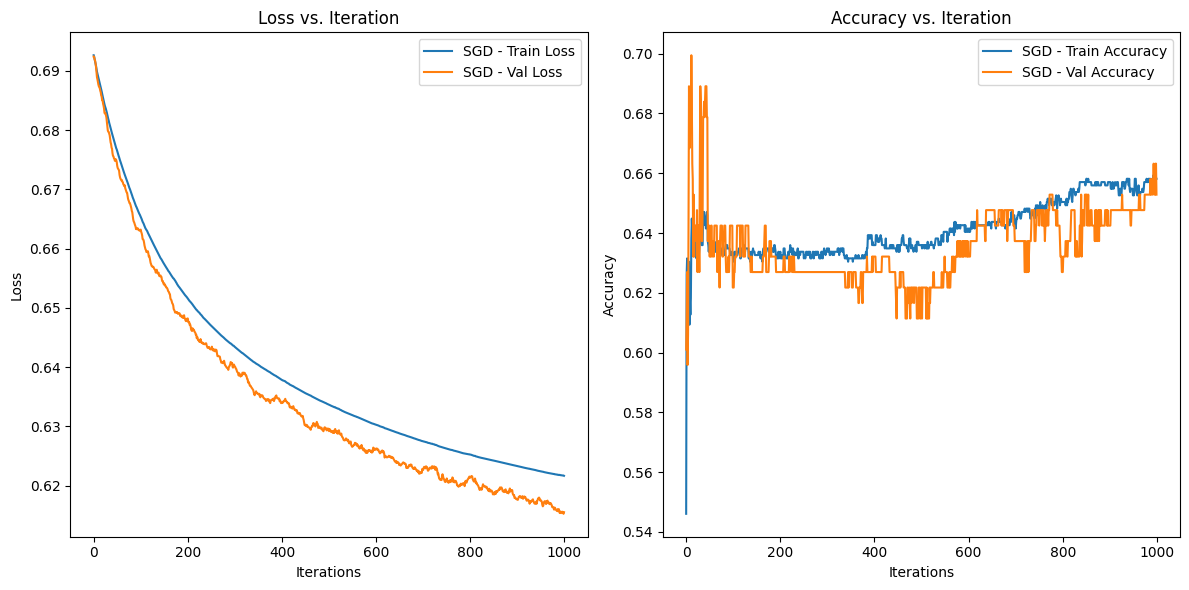

In [15]:
def accuracy(y_true, y_pred):
    return np.mean((y_pred >= 0.5) == y_true)

def LogisticRegressionSGD(X_train, y_train, X_val, y_val, learning_rate, iterations):
    m = len(y_train)
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []
    
    for i in range(iterations):
        for j in range(m):  # SGD updates after each sample
            random_idx = np.random.randint(0, m)
            X_i = X_train[random_idx, :].reshape(1, -1)
            y_i = y_train[random_idx]

            # Compute prediction
            z = np.dot(X_i, weights) + bias
            y_pred = sigmoid(z)

            # Gradients
            dz = y_pred - y_i
            dw = np.dot(X_i.T, dz)
            db = dz

            # Update weights and bias
            weights -= learning_rate * dw.flatten()
            bias -= learning_rate * db

        # Compute loss and accuracy for the entire training and validation sets
        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = crossEntropyLoss(y_train, y_train_pred)
        val_loss = crossEntropyLoss(y_val, y_val_pred)
        train_cost_history.append(train_loss)
        val_cost_history.append(val_loss)

        train_accuracy = accuracy(y_train, y_train_pred)
        val_accuracy = accuracy(y_val, y_val_pred)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        if i % 100 == 0:
            print(f'SGD Iteration {i} - Training Loss: {train_loss}, Validation Loss: {val_loss}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}')

    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

# Hyperparameters
learning_rate = 0.0001
iterations = 1000

# SGD
print("Training with Stochastic Gradient Descent:")
weights_sgd, bias_sgd, train_cost_sgd, val_cost_sgd, train_acc_sgd, val_acc_sgd = LogisticRegressionSGD(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, iterations)

# Plot Training Loss for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_sgd, label='SGD - Train Loss')
plt.plot(val_cost_sgd, label='SGD - Val Loss')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy for comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_sgd, label='SGD - Train Accuracy')
plt.plot(val_acc_sgd, label='SGD - Val Accuracy')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Training with Mini-Batch Gradient Descent (batch size = 32):
MBGD Iteration 0 - Training Loss: 0.6917886688462583, Validation Loss: 0.6913767271116787, Training Accuracy: 0.5937846836847946, Validation Accuracy: 0.6683937823834197
MBGD Iteration 100 - Training Loss: 0.6423904432837934, Validation Loss: 0.6380206421724486, Training Accuracy: 0.632630410654828, Validation Accuracy: 0.6269430051813472
MBGD Iteration 200 - Training Loss: 0.6295452690679443, Validation Loss: 0.6244823189766704, Training Accuracy: 0.6426193118756937, Validation Accuracy: 0.6476683937823834
MBGD Iteration 300 - Training Loss: 0.6226132009824307, Validation Loss: 0.6177329492588252, Training Accuracy: 0.6548279689234184, Validation Accuracy: 0.6476683937823834
MBGD Iteration 400 - Training Loss: 0.6182916487524112, Validation Loss: 0.6138892809783676, Training Accuracy: 0.6637069922308546, Validation Accuracy: 0.6683937823834197
MBGD Iteration 500 - Training Loss: 0.6154706361437401, Validation Loss: 0.611361

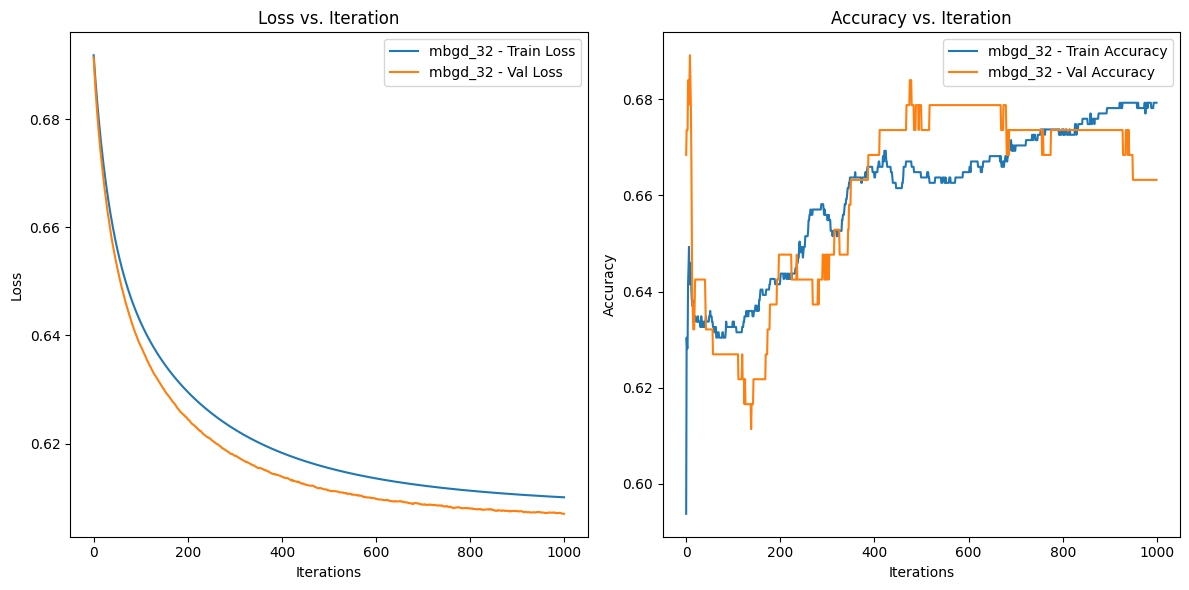


Training with Mini-Batch Gradient Descent (batch size = 64):
MBGD Iteration 0 - Training Loss: 0.6924597578768882, Validation Loss: 0.6922460757835525, Training Accuracy: 0.5882352941176471, Validation Accuracy: 0.6683937823834197
MBGD Iteration 100 - Training Loss: 0.6562320122442242, Validation Loss: 0.6527391473758389, Training Accuracy: 0.634850166481687, Validation Accuracy: 0.6321243523316062
MBGD Iteration 200 - Training Loss: 0.6424891437472481, Validation Loss: 0.6381115023674749, Training Accuracy: 0.632630410654828, Validation Accuracy: 0.6269430051813472
MBGD Iteration 300 - Training Loss: 0.6348267378865953, Validation Loss: 0.6299433554584309, Training Accuracy: 0.6359600443951166, Validation Accuracy: 0.6217616580310881
MBGD Iteration 400 - Training Loss: 0.6295913293339506, Validation Loss: 0.6245939656935697, Training Accuracy: 0.6415094339622641, Validation Accuracy: 0.6476683937823834
MBGD Iteration 500 - Training Loss: 0.6256793961563285, Validation Loss: 0.6207526

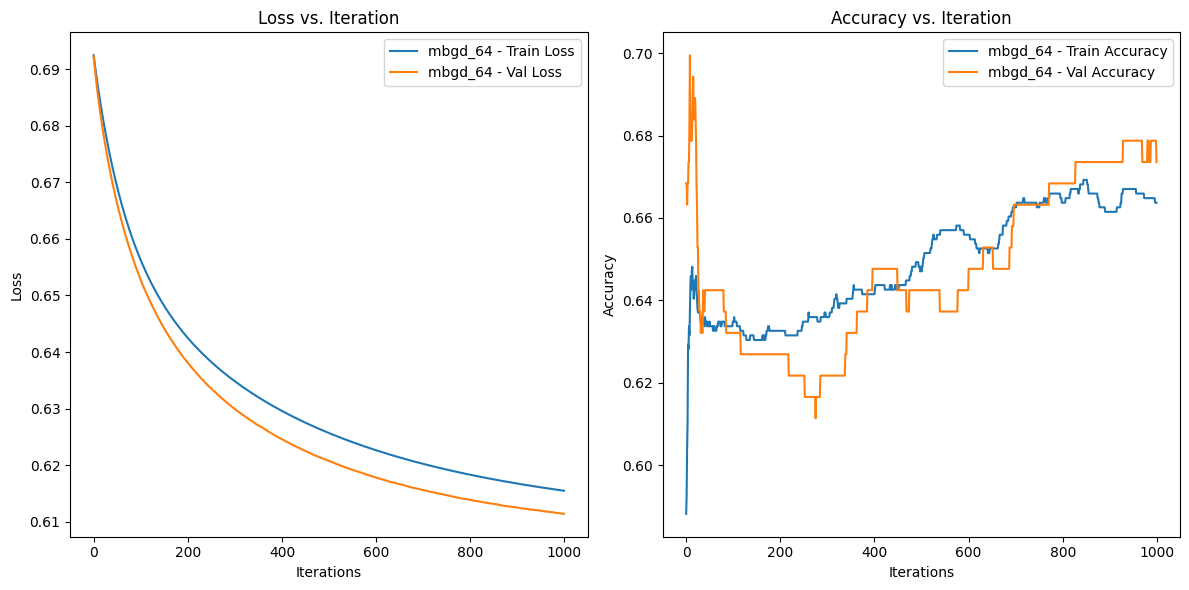

In [16]:
def LogisticRegressionMiniBatchGD(X_train, y_train, X_val, y_val, learning_rate, iterations, batch_size):
    m = len(y_train)
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    for i in range(iterations):
        # Shuffle the training data for each iteration
        permutation = np.random.permutation(m)
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for j in range(0, m, batch_size):  # Iterate through mini-batches
            X_batch = X_train_shuffled[j:j+batch_size]
            y_batch = y_train_shuffled[j:j+batch_size]

            # Compute prediction
            z = np.dot(X_batch, weights) + bias
            y_pred = sigmoid(z)

            # Gradients
            dz = y_pred - y_batch
            dw = np.dot(X_batch.T, dz) / batch_size
            db = np.sum(dz) / batch_size

            # Update weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Compute loss and accuracy for the entire training and validation sets
        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = crossEntropyLoss(y_train, y_train_pred)
        val_loss = crossEntropyLoss(y_val, y_val_pred)
        train_cost_history.append(train_loss)
        val_cost_history.append(val_loss)

        train_accuracy = accuracy(y_train, y_train_pred)
        val_accuracy = accuracy(y_val, y_val_pred)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        if i % 100 == 0:
            print(f'MBGD Iteration {i} - Training Loss: {train_loss}, Validation Loss: {val_loss}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}')

    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

learning_rate = 0.01
iterations = 1000

# Mini-Batch GD with batch size = 32
print("\nTraining with Mini-Batch Gradient Descent (batch size = 32):")
batch_size = 32
weights_mbgd_32, bias_mbgd_32, train_cost_mbgd_32, val_cost_mbgd_32, train_acc_mbgd_32, val_acc_mbgd_32 = LogisticRegressionMiniBatchGD(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, iterations, batch_size)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_mbgd_32, label='mbgd_32 - Train Loss')
plt.plot(val_cost_mbgd_32, label='mbgd_32 - Val Loss')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy for comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_mbgd_32, label='mbgd_32 - Train Accuracy')
plt.plot(val_acc_mbgd_32, label='mbgd_32 - Val Accuracy')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Mini-Batch GD with batch size = 64
print("\nTraining with Mini-Batch Gradient Descent (batch size = 64):")
batch_size = 64
weights_mbgd_64, bias_mbgd_64, train_cost_mbgd_64, val_cost_mbgd_64, train_acc_mbgd_64, val_acc_mbgd_64 = LogisticRegressionMiniBatchGD(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, iterations, batch_size)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_mbgd_64, label='mbgd_64 - Train Loss')
plt.plot(val_cost_mbgd_64, label='mbgd_64 - Val Loss')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy for comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_mbgd_64, label='mbgd_64 - Train Accuracy')
plt.plot(val_acc_mbgd_64, label='mbgd_64 - Val Accuracy')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
def accuracy_score(y_true, y_pred):
    return np.mean((y_pred == y_true))

def k_fold_cross_validation(X, y, k=5, learning_rate=0.01, iterations=1000):
    np.random.seed(42)
    indices = np.random.permutation(len(y))
    X = X[indices]
    y = y[indices]
    
    fold_size = len(y) // k
    folds_X = [X[i*fold_size:(i+1)*fold_size] for i in range(k)]
    folds_y = [y[i*fold_size:(i+1)*fold_size] for i in range(k)]
    
    accuracies, precisions, recalls, f1_scores = [], [], [], []

    # Perform cross-validation
    for i in range(k):
        # Use fold i as the validation set, and the rest as training set
        X_val, y_val = folds_X[i], folds_y[i]
        X_train = np.vstack([folds_X[j] for j in range(k) if j != i])
        y_train = np.hstack([folds_y[j] for j in range(k) if j != i])
        
        # Train the logistic regression model
        weights, bias,a,b,c,d,e = LogisticRegressionBatchGD(X_train, y_train, X_val, y_val, learning_rate, iterations)
        
        # Make predictions on validation set
        y_val_pred_prob = sigmoid(np.dot(X_val, weights) + bias)
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
        
        # Calculate metrics
        accuracies.append(accuracy_score(y_val, y_val_pred))
        precisions.append(precision_score(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        f1_scores.append(f1_score(y_val, y_val_pred))

    # Calculate mean and standard deviation for each metric
    print(f'Accuracy: Mean = {np.mean(accuracies):.4f}, Std = {np.std(accuracies):.4f}')
    print(f'Precision: Mean = {np.mean(precisions):.4f}, Std = {np.std(precisions):.4f}')
    print(f'Recall: Mean = {np.mean(recalls):.4f}, Std = {np.std(recalls):.4f}')
    print(f'F1 Score: Mean = {np.mean(f1_scores):.4f}, Std = {np.std(f1_scores):.4f}')

    return accuracies, precisions, recalls, f1_scores

# Example dataset (X as features, y as labels)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Perform 5-fold cross-validation using Batch Gradient Descent
k_fold_cross_validation(X, y, k=5, learning_rate=0.01, iterations=1000)


Cost after iteration 0: 2.3609126840996653
Cost after iteration 100: 8.601096061884375


C:\Users\himan\AppData\Local\Temp\ipykernel_32188\2875674457.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 200: 8.529420239253716
Cost after iteration 300: 8.280594339237645
Cost after iteration 400: 8.242713604188678
Cost after iteration 500: 8.237651052436863
Cost after iteration 600: 8.202904609220372
Cost after iteration 700: 7.985728383778976
Cost after iteration 800: 7.887287972246236
Cost after iteration 900: 7.945933416040927
Cost after iteration 0: 4.631828506519966


C:\Users\himan\AppData\Local\Temp\ipykernel_32188\2875674457.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 100: 9.102826666077629
Cost after iteration 200: 9.102826666077629
Cost after iteration 300: 9.127257666675435
Cost after iteration 400: 8.992748542706497
Cost after iteration 500: 8.89541785699662
Cost after iteration 600: 8.749878033024743
Cost after iteration 700: 8.650228143931367
Cost after iteration 800: 8.58579866550159
Cost after iteration 900: 8.52887865259565
Cost after iteration 0: 7.23211575180292
Cost after iteration 100: 9.31785406787474
Cost after iteration 200: 9.31785406787474


C:\Users\himan\AppData\Local\Temp\ipykernel_32188\2875674457.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 300: 9.31785406787474
Cost after iteration 400: 9.317851456488484
Cost after iteration 500: 9.266678426877693
Cost after iteration 600: 9.234067708330466
Cost after iteration 700: 9.152823821717961
Cost after iteration 800: 8.884282124585365
Cost after iteration 900: 8.783245464690348
Cost after iteration 0: 9.602709706368538
Cost after iteration 100: 9.747908871468958


C:\Users\himan\AppData\Local\Temp\ipykernel_32188\2875674457.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 200: 9.747908871468958
Cost after iteration 300: 9.747908871468958
Cost after iteration 400: 9.747908871468958
Cost after iteration 500: 9.747908871468958
Cost after iteration 600: 9.522598105179934
Cost after iteration 700: 9.524115226086005
Cost after iteration 800: 9.364209091928508
Cost after iteration 900: 9.32055395219595
Cost after iteration 0: 6.012377286070656


C:\Users\himan\AppData\Local\Temp\ipykernel_32188\2875674457.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 100: 9.2461782672757
Cost after iteration 200: 9.31785262163035
Cost after iteration 300: 9.393622335643176
Cost after iteration 400: 9.391828432963699
Cost after iteration 500: 9.371240561482944
Cost after iteration 600: 9.36707910291567
Cost after iteration 700: 9.268086471738627
Cost after iteration 800: 9.124836854798179
Cost after iteration 900: 9.13915051944259
Accuracy: Mean = 0.5471, Std = 0.0080
Precision: Mean = 0.8352, Std = 0.0945
Recall: Mean = 0.1194, Std = 0.0186
F1 Score: Mean = 0.2081, Std = 0.0291


([0.5369649805447471,
  0.5447470817120622,
  0.556420233463035,
  0.556420233463035,
  0.5408560311284046],
 [0.9090909090909091,
  0.9333333333333333,
  0.8095238095238095,
  0.6666666666666666,
  0.8571428571428571],
 [0.145985401459854,
  0.1076923076923077,
  0.13385826771653545,
  0.11570247933884298,
  0.09375],
 [0.25157232704402516,
  0.19310344827586207,
  0.22972972972972974,
  0.19718309859154928,
  0.16901408450704225])